machine learning pipeline

In [83]:
import pandas as pd
import numpy as np

In [84]:
df= pd.read_csv('diabetes2.csv')

In [85]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [86]:
df.shape

(768, 9)

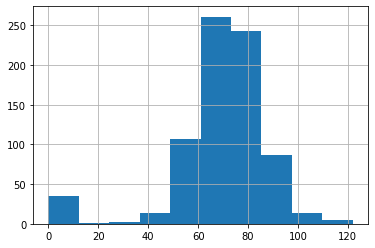

In [87]:
df.BloodPressure.hist()

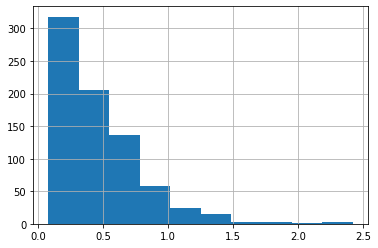

In [88]:
df.DiabetesPedigreeFunction.hist()

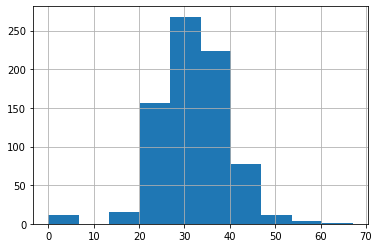

In [89]:
df.BMI.hist()

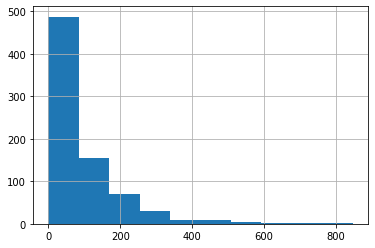

In [90]:
df.Insulin.hist()

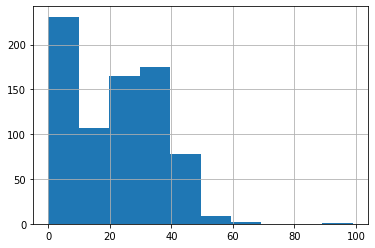

In [91]:
df.SkinThickness.hist()

In [92]:
#does not make sense to have 0 blood pressure
df=df[df.BloodPressure != 0]

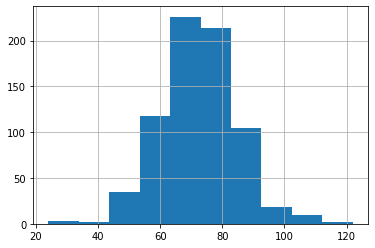

In [93]:
df.BloodPressure.hist()

In [94]:
#does not make sense to have 0 BMI
df=df[df.BMI != 0]

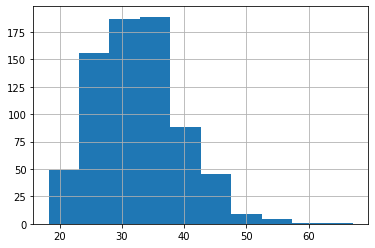

In [95]:
df.BMI.hist()

In [96]:
df.shape

(729, 9)

In [97]:
def show_df_info(dataframe):
    # get the data type
    print(type(dataframe))
    print("amount of entries is %s" % dataframe.size)
    print("dimensions= %i" % dataframe.ndim)
    print("shape is ", end="")
    print(dataframe.shape)
    print("axes: ", end="")
    print(dataframe.axes)
    print("data types of columns:")
    print(dataframe.dtypes)
    print("features: %s" % dataframe.columns)

In [98]:
def sliceDataFrame(df):
# remove 2 instances with class label "normal find" and 4 instances with class label "fibrosis"
    return df.iloc[:, :-1], df['Outcome']

In [99]:
X, y = sliceDataFrame(df)
show_df_info(X)

<class 'pandas.core.frame.DataFrame'>
amount of entries is 5832
dimensions= 2
shape is (729, 8)
axes: [Int64Index([  0,   1,   2,   3,   4,   5,   6,   8,  10,  11,
            ...
            758, 759, 760, 761, 762, 763, 764, 765, 766, 767],
           dtype='int64', length=729), Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')]
data types of columns:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object
features: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [100]:
from sklearn import tree, pipeline, preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score

In [101]:
logit = LogisticRegression(solver='lbfgs')
pipeline1 = pipeline.Pipeline(steps=[
    ("feature_selection", SelectKBest(chi2, k=5)),
    ("scale", preprocessing.StandardScaler()),  
    ("Logit", logit)])

In [102]:
pipeline1.fit(X, y) 

Pipeline(memory=None,
         steps=[('feature_selection',
                 SelectKBest(k=5,
                             score_func=<function chi2 at 0x000001DA7B1F9168>)),
                ('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('Logit',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [103]:
scores2 = cross_val_score(pipeline1, X,y, cv=4)

In [104]:
meanCvAccuracy_logit = scores2.mean()
print("Mean CV accuracy= %f" % meanCvAccuracy_logit)

Mean CV accuracy= 0.772418


In [105]:
logit = LogisticRegression(solver='lbfgs')
pipeline2 = pipeline.Pipeline(steps=[
    ("feature_selection", SelectKBest(k='all')),
    ("scale", preprocessing.StandardScaler()),  
    ("Logit", logit)])

In [106]:
pipeline2.fit(X, y) 

Pipeline(memory=None,
         steps=[('feature_selection',
                 SelectKBest(k='all',
                             score_func=<function f_classif at 0x000001DA7B1F9678>)),
                ('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('Logit',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [107]:
scores1 = cross_val_score(pipeline2, X,y, cv=10)

In [108]:
meanCvAccuracy_logit = scores1.mean()
print("Mean CV accuracy= %f" % meanCvAccuracy_logit)

Mean CV accuracy= 0.775029


In [109]:
model = LogisticRegression()
pipeline3 = pipeline.Pipeline(steps=[
    ("feature_selection", RFE(model)),
    ("scale", preprocessing.StandardScaler()),  
    ("logit", model)])

In [110]:
pipeline3.fit(X, y) 

C:\Users\gissellec\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gissellec\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gissellec\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gissellec\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gissellec\AppData\Local\Programs\Py

Pipeline(memory=None,
         steps=[('feature_selection',
                 RFE(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                  dual=False,
                                                  fit_intercept=True,
                                                  intercept_scaling=1,
                                                  l1_ratio=None, max_iter=100,
                                                  multi_class='warn',
                                                  n_jobs=None, penalty='l2',
                                                  random_state=None,
                                                  solver='warn', tol=0.0001,
                                                  verbose=0, warm_start=False),
                     n_features_to_select=None, step=1, verbose=0)),
                ('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logit',
            

In [111]:
scores3 = cross_val_score(pipeline3, X,y, cv=10)

C:\Users\gissellec\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gissellec\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gissellec\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gissellec\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gissellec\AppData\Local\Programs\Py

In [112]:
meanCvAccuracy_rfe = scores3.mean()
print("Mean CV accuracy= %f" % meanCvAccuracy_rfe)

Mean CV accuracy= 0.769568


In [118]:
cart_model = tree.DecisionTreeClassifier()
pipe1 = pipeline.Pipeline(steps=[
    ("feature_selection", RFE(cart_model)),
    ("scale", preprocessing.StandardScaler()),  
    ("CART", cart_model)])

In [119]:
pipe1.fit(X,y)
scores11 = cross_val_score(pipe1, X,y, cv=5)

In [120]:
meanCvAccuracy_cart = scores11.mean()
print("Mean CV accuracy= %f" % meanCvAccuracy_cart)

Mean CV accuracy= 0.692654


In [121]:
from sklearn.feature_selection import mutual_info_classif

In [124]:
logit = LogisticRegression()
pipeline5 = pipeline.Pipeline(steps=[
    ("feature_selection", SelectKBest(mutual_info_classif,k='all')),
    ("scale", preprocessing.StandardScaler()),  
    ("Logit", logit)])

In [125]:
pipeline5.fit(X,y)
scores5= cross_val_score(pipeline5, X,y, cv=10)

C:\Users\gissellec\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gissellec\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gissellec\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gissellec\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gissellec\AppData\Local\Programs\Py

In [126]:
meanCvAccuracy_mutual = scores5.mean()
print("Mean CV accuracy= %f" % meanCvAccuracy_mutual)

Mean CV accuracy= 0.775010


In [127]:
from sklearn.externals import joblib
PIPELINEPATH= "toppipeline"
DATASETPATH= "toppineline.data"
joblib.dump(pipeline5, PIPELINEPATH, compress = 1)

C:\Users\gissellec\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['toppipeline']

In [128]:
pipeline_loaded = joblib.load(PIPELINEPATH)

In [129]:
from sklearn.externals import joblib
PIPELINEPATH1= "top2pipeline"
DATASETPATH2= "toppineline2.data"
joblib.dump(pipeline2, PIPELINEPATH1, compress = 1)

['top2pipeline']

In [130]:
pipeline2_loaded = joblib.load(PIPELINEPATH1)